In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import time

In [ ]:
# Input file name
input_file = 'risks_sources.txt'

# Read the input file and extract data
data = []
with open(input_file, 'r') as file:
    lines = file.readlines()
    for line in lines:
        parts = line.strip().split(' - ')
        if len(parts) == 2:
            data.append({'Name': parts[1], 'Occurrences': int(parts[0].split(' ')[0])})

# Create a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
output_csv_file = 'risks_sources.csv'
df.to_csv(output_csv_file, index=False)

print(f"CSV file '{output_csv_file}' has been created.")


In [ ]:
df = pd.read_csv('risks_sources.csv')
df.describe()

In [ ]:
lim = 5

sum = 0
for i in range(1, lim+1):
    count_contrib = df[df['Occurrences'] == i].shape[0]
    sum += count_contrib
    print(f'Number of sources with {i} contributions: {count_contrib}')

print(f'Total: {sum}')
print(f'Remaining: {df.shape[0] - sum}')

In [ ]:
df_filtered = df[df['Occurrences'] > lim]
df_filtered.describe()

In [ ]:
# Create a histogram with a separate bin for sources with only 1 contribution
plt.hist(df_filtered['Occurrences'], bins=25)
plt.xlabel('Occurrences')
plt.ylabel('Frequency')
plt.title('Distribution of Occurrences with a Separate Bin for 1 Contribution')
# plt.xlim(1, 75)
plt.grid(True)

# Show the histogram
plt.show()

In [ ]:
contributions_per_source = df_filtered.groupby('Name')['Occurrences'].sum().reset_index()

# Set a larger figure size for more space on the y-axis
plt.figure(figsize=(10, len(contributions_per_source) * 0.2))

# Create a horizontal bar chart
plt.barh(contributions_per_source['Name'], contributions_per_source['Occurrences'])
plt.xlabel('Number of Contributions')
plt.ylabel('Source')
plt.title('Number of Contributions per Source')
plt.tight_layout()

# Save the horizontal bar chart
plt.savefig("contributions_per_source.png")
print("Image file 'contributions_per_source.png' has been created.")

In [ ]:
# Function to drop irrelevant sources
def drop_irrelevant_sources(df, output_csv_file):
    total_rows = len(df)
    start_time = time.time()
    
    for index, row in df.iterrows():
        source_name = row['Name']
        
        # Display progress and timer
        progress = index / total_rows * 100
        elapsed_time = time.time() - start_time
        print(f'\rProgress: {progress:.2f}%, Elapsed Time: {elapsed_time:.2f}s', flush=True)
        
        # Ask user whether to drop the source
        drop_source = input(f'\nDrop "{source_name}"? (y/n/stop): ')
        
        if drop_source.lower() == 'y':
            df.drop(index, inplace=True)
            print(f'"{source_name}" dropped.')
        elif drop_source.lower() == 'stop':
            break
        else:
            print(f'"{source_name}" kept.')

    # Save the filtered DataFrame to a new CSV file
    df.to_csv(output_csv_file, index=False)
    print(f'\nFiltered DataFrame saved to {output_csv_file}.')

# Call the function to drop irrelevant sources
drop_irrelevant_sources(df_filtered, "risks_sources_filtered.csv")

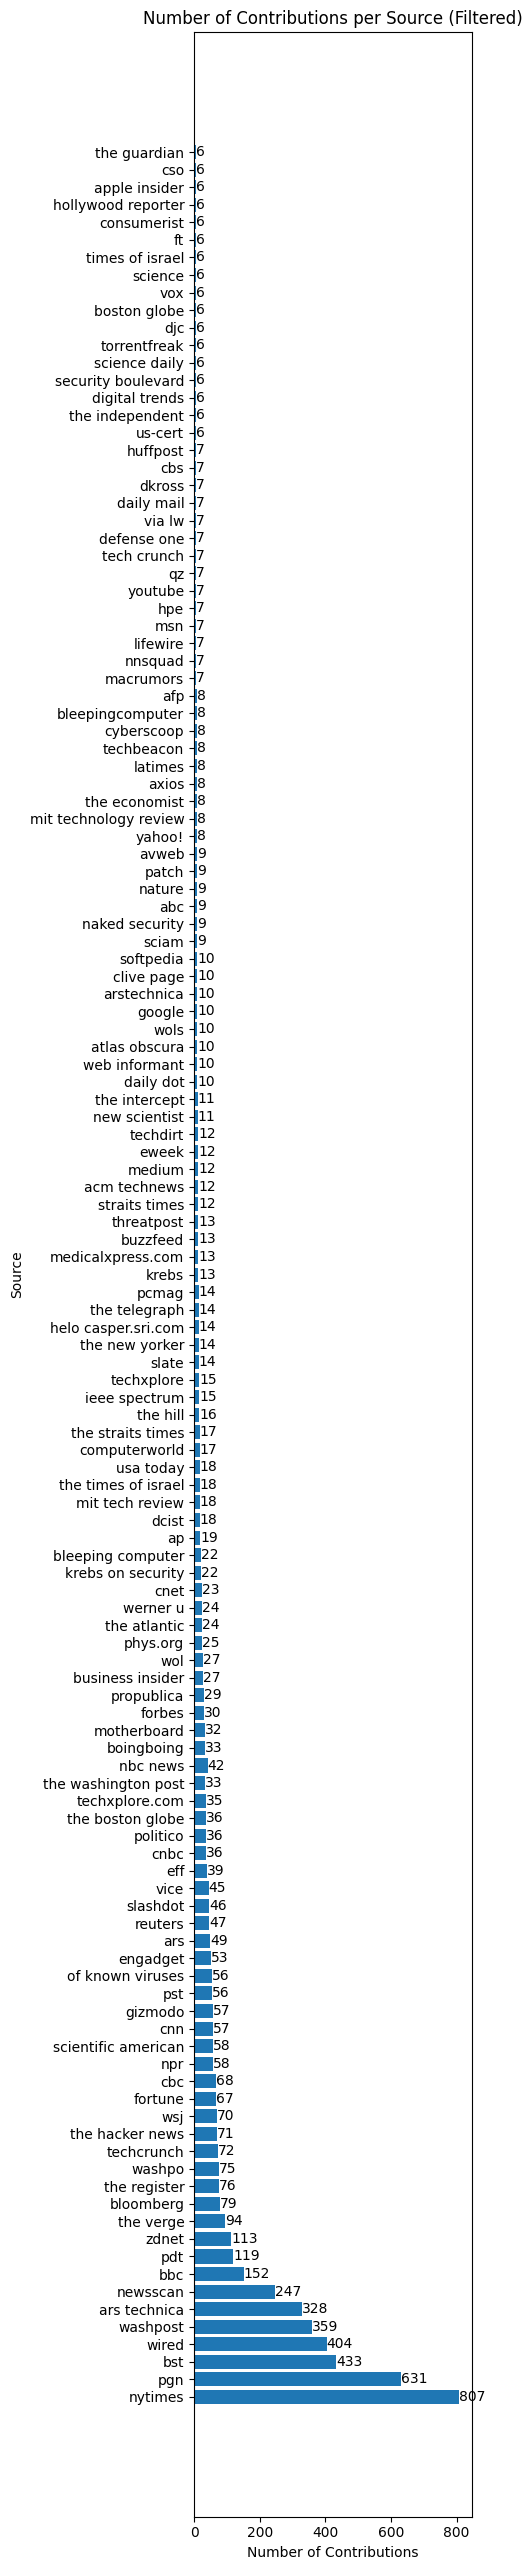

In [2]:
# Load the filtered DataFrame from the CSV file
filtered_df = pd.read_csv('risks_sources_filtered_merged.csv')

# Create a horizontal bar chart with a dynamically sized figure
plt.figure(figsize=(5, len(filtered_df) * 0.2))
bars = plt.barh(filtered_df['Name'], filtered_df['Occurrences'])
plt.xlabel('Number of Contributions')
plt.ylabel('Source')
plt.title('Number of Contributions per Source (Filtered)')

# Add the number of occurrences next to each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', va='center', ha='left')

plt.tight_layout()

# Show the horizontal bar chart
plt.savefig("contributions_per_source_filtered.png")